### Testing

This notebook contains tests to make sure my implementation of WOSA and Scipy's Welch give the same output 


In [1]:
import os as os
import sys

# adding folders to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd()  , '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

akshat_lisa_root = os.path.abspath(os.path.join(os.getcwd()  , '..',))
if akshat_lisa_root not in sys.path:
    sys.path.insert(0, akshat_lisa_root)

import matplotlib.pyplot as plt
from scripts.wosa import wosa
from scripts.psdAndPlot import psd_and_plot_hor
from scripts.psdAndPlotTDI import psdAndPlotTDI
import numpy as np

/Users/akmdgreat/anaconda3/envs/bethenv/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


Regular Scipy Welch
Custom WOSA yooohoo
[8.28471131e+01 5.43190164e+00 7.64511356e+02 8.81244115e+02
 4.12170931e+01 1.47287962e+00 5.06100125e-01 1.74101589e+00
 1.99962470e+00 2.09061871e+00 5.77394016e+00 1.18973246e+01
 3.81068617e+00 5.06167720e+00 1.07083295e+01 2.19409353e+00
 2.89288900e+00 1.14489652e+00 7.67076993e+00 5.10788527e+00
 1.64996495e+00 2.55076596e+00 2.70650634e+00 1.91905562e-01
 9.82345207e+00 1.09690937e+01 2.22143723e+00 9.47812580e-01
 3.59064510e+00 1.70153094e+00 7.30812140e-01 4.36262274e-01
 4.18979683e-01 8.97436618e-01 4.06899069e+00 4.00204767e+00
 4.11078442e+00 1.30653161e-01 1.22207407e+00 1.98698101e+00
 6.57115768e+00 6.81827657e+00 8.25325074e+00 2.79909819e+00
 3.93805925e-01 1.92749699e+00 2.04955070e+00 1.89817723e+00
 2.64350325e+00 3.99127644e+00 1.22491222e-02 4.57732611e-01
 2.38364878e+00 3.97194159e+00 9.27476148e+00 5.21841088e+00
 1.86561713e+00 7.40522012e-01 7.97644369e-02 9.34691475e-01
 1.28311651e+00 1.65861584e+00 3.19303106e+00

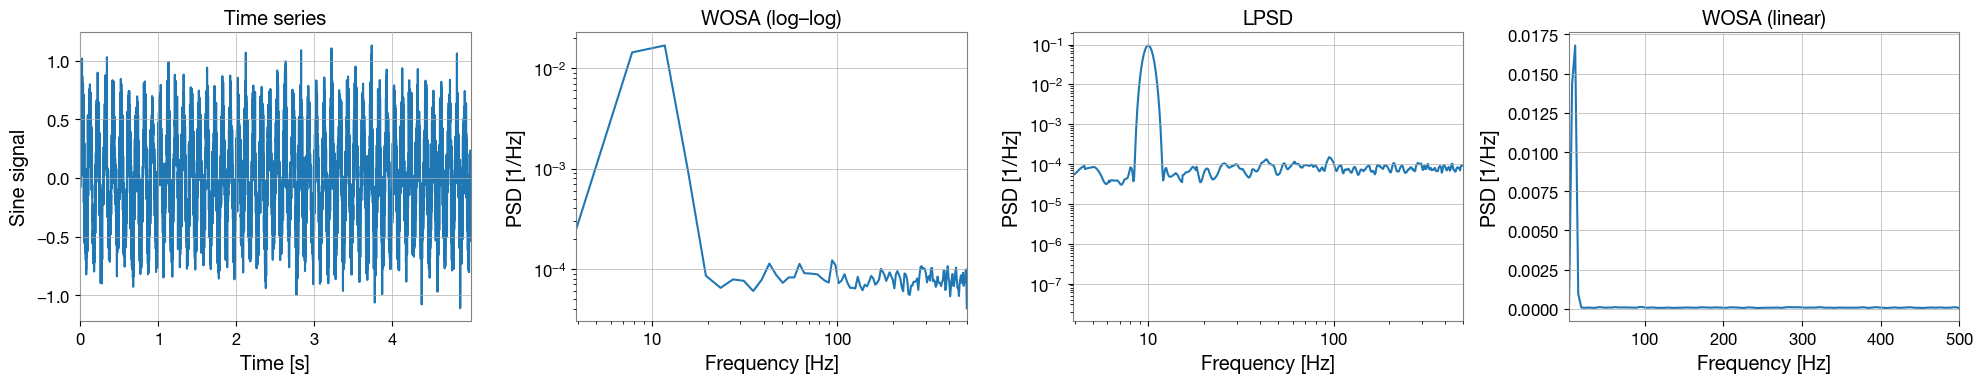

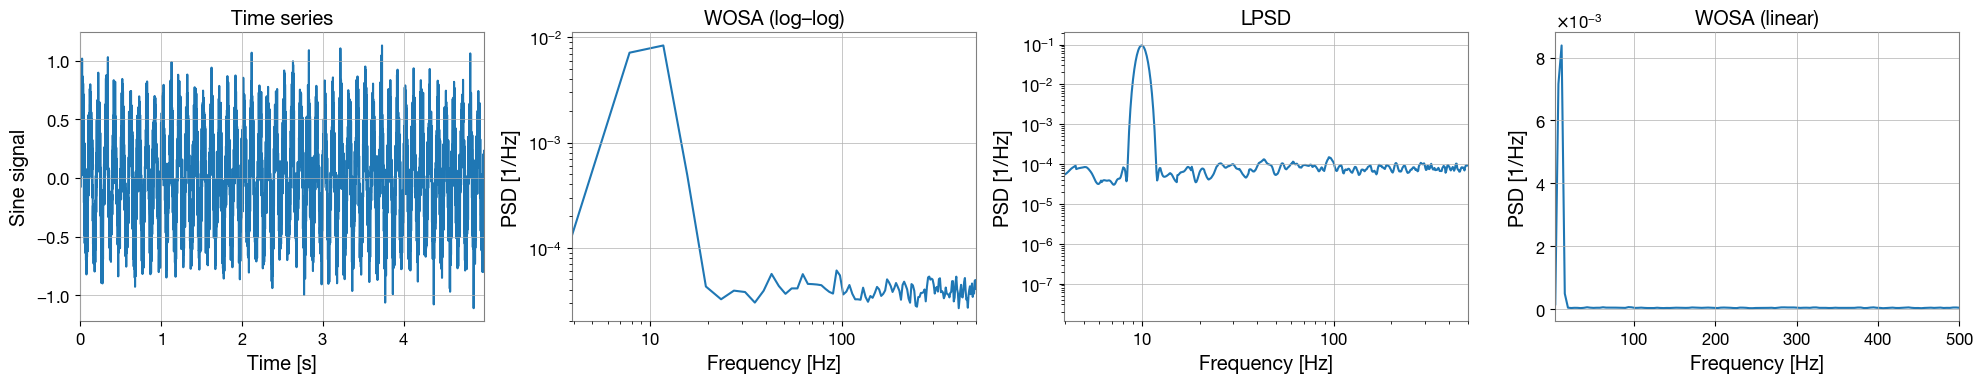

In [2]:
# Synthetic example: 10 Hz sine in white Gaussian noise
fs = 1000          # Hz
t  = np.arange(0, 5, 1/fs)
dt = t[1] - t[0]
nper = 256
sig = 0.5*np.sin(2*np.pi*10*t) + 0.2*np.random.randn(t.size)

psd_and_plot_hor(
    data = sig, 
    t = t, 
    dt = dt, 
    nper = 256, 
    title = "Sine signal", 
    window = 'hann', 
    scaling = 'density', 
    custom_wosa=False
)

psd_and_plot_hor(
    data = sig, 
    t = t, 
    dt = dt, 
    nper = 256, 
    title = "Sine signal", 
    window = 'hann', 
    scaling = 'density', 
    custom_wosa=True
)

Regular Scipy Welch


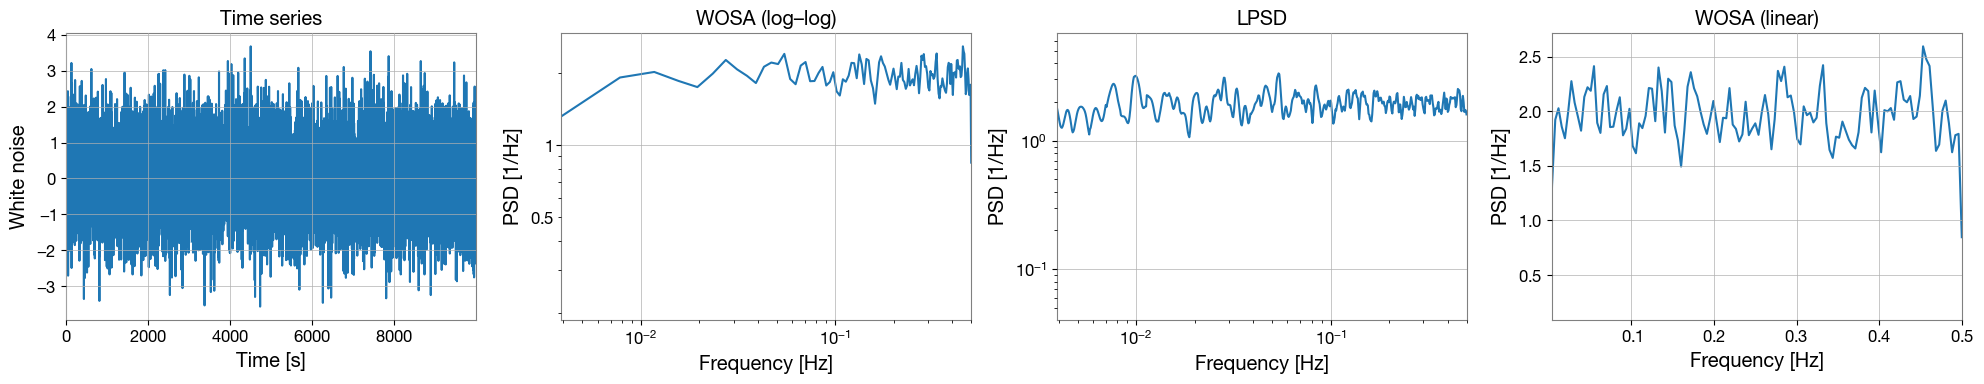

In [11]:
mean = 0
std = 1 
num_samples = 10000
whiteNoise = np.random.normal(mean, std, size=num_samples)

t   = np.arange(num_samples)
data = whiteNoise
dt  = 1
psd_and_plot_hor(data, t, dt, nper=256, title="White noise", custom_wosa=False)
psd_and_plot_hor(data, t, dt, nper=256, title="White noise", custom_wosa=True)

Regular Scipy Welch
Custom WOSA yooohoo
Exiting custom wosa


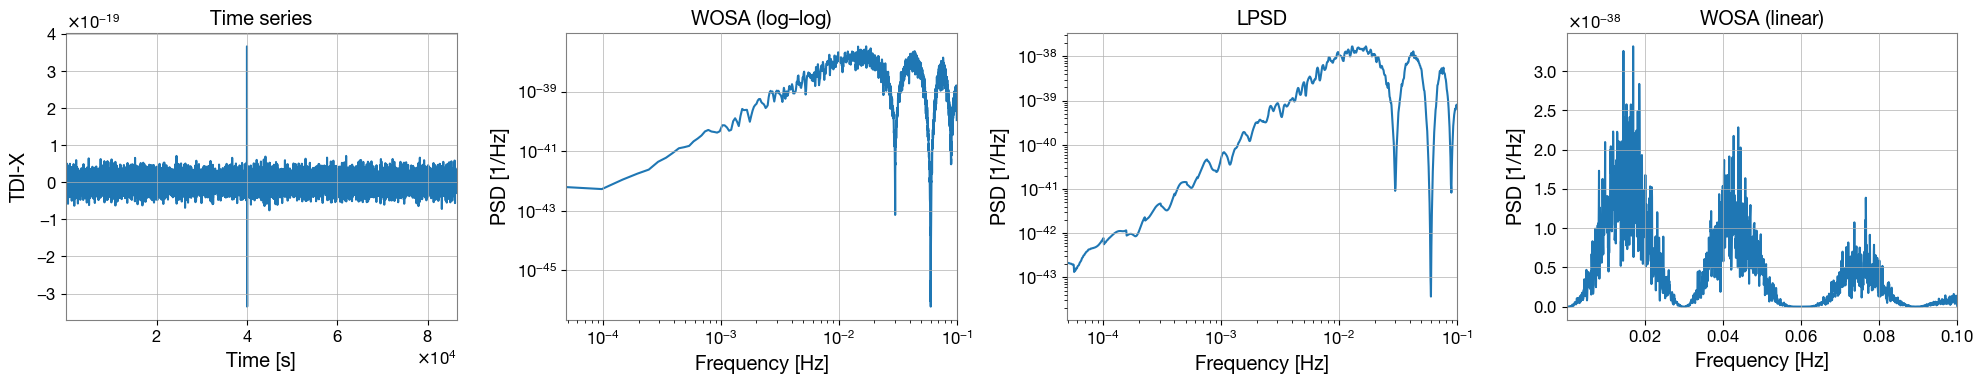

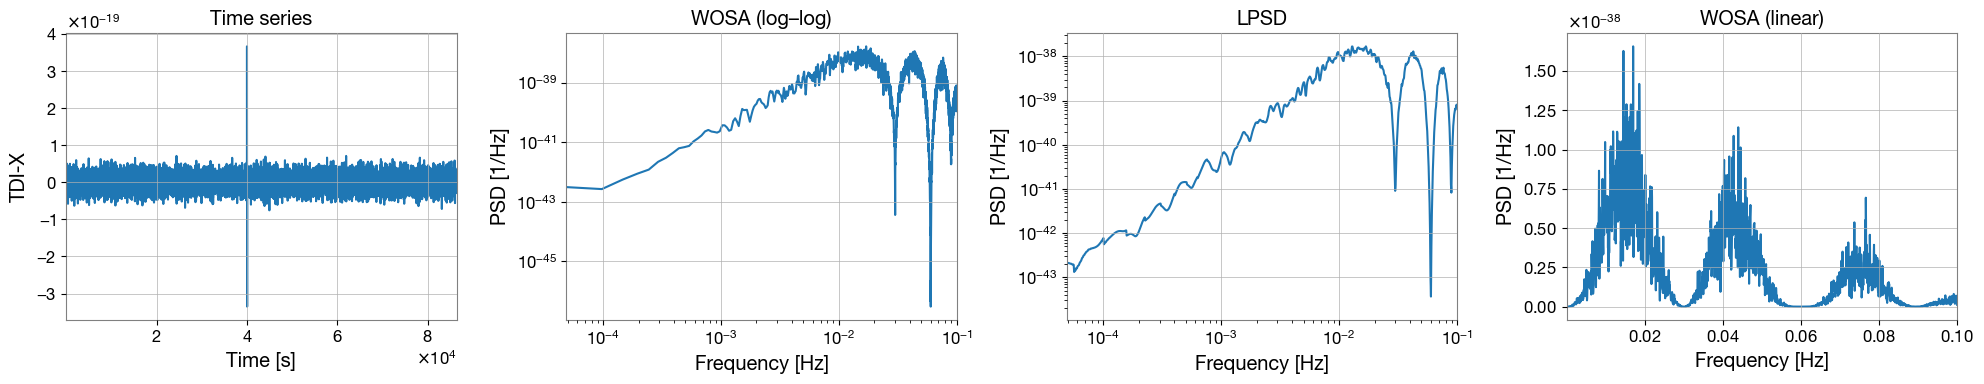

In [14]:
bethLISA_directory = os.path.join(os.getcwd(), "..", "..", "bethLISA")
glitch_simulation_directory = os.path.join(bethLISA_directory, 'lisa_glitch_simulation')
tdi_output_directory = os.path.join(glitch_simulation_directory, 'tdi_outputs')

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "small_glitch_tdi.h5"),
    custom_wosa = False
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "small_glitch_tdi.h5"),
    custom_wosa = True
)